In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('myexcel.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [6]:
# Correcting the Hight column

np.random.seed(42)  # for reproducibility
df['height'] = np.random.randint(150, 181, size=len(df))

In [9]:
# 1 Epmloyee Distribution by team

team_dist = df['Team'].value_counts()
team_percent = (team_dist / len(df)) * 100

team_df = pd.DataFrame({
    'Count': team_dist,
    'Percentage': team_percent
})

team_df



,Count,Percentage
Team,,
New Orleans Pelicans,19,4.148472
Memphis Grizzlies,18,3.930131
Utah Jazz,16,3.493450
Milwaukee Bucks,16,3.493450
New York Knicks,16,3.493450
Boston Celtics,15,3.275109
Los Angeles Clippers,15,3.275109
Los Angeles Lakers,15,3.275109
Phoenix Suns,15,3.275109


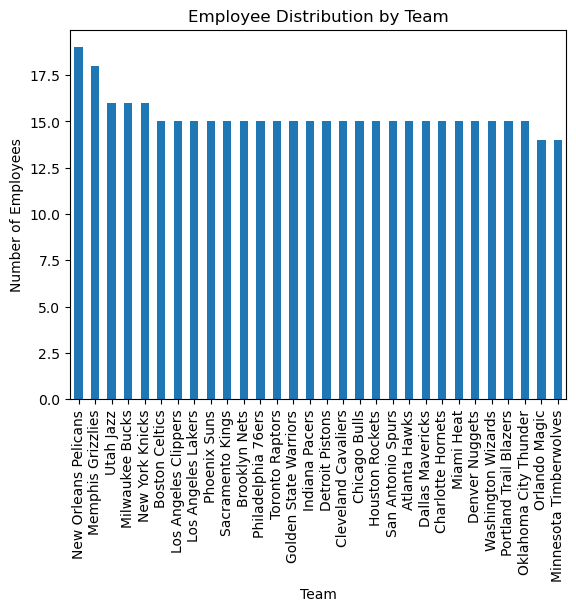

In [10]:
plt.figure()
team_dist.plot(kind='bar')
plt.title('Employee Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()

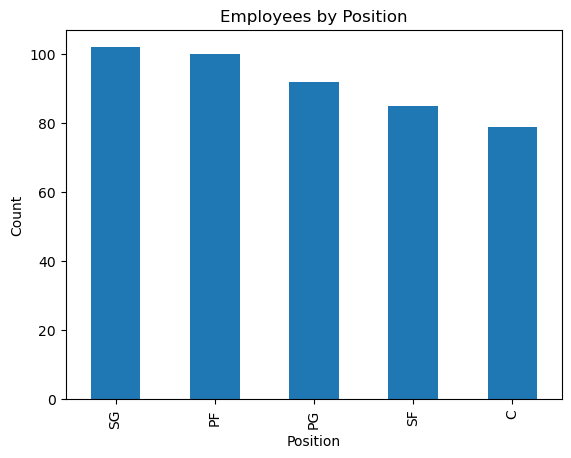

In [11]:
# 2 Employees Segregated by Position

position_dist = df['Position'].value_counts()

plt.figure()
position_dist.plot(kind='bar')
plt.title('Employees by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

In [12]:
# 3 Predominant Age Groups

bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

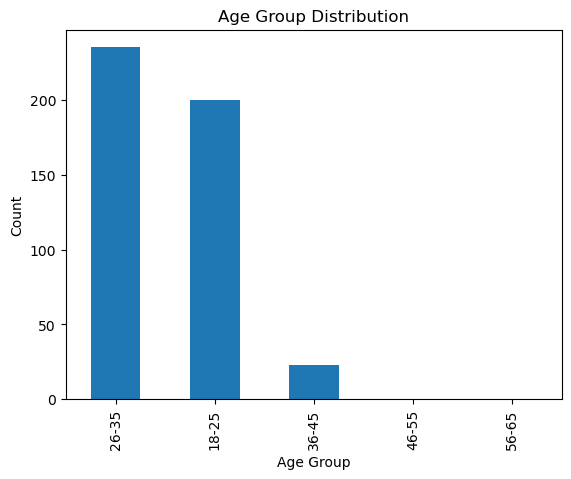

In [13]:
age_group_dist = df['Age_Group'].value_counts()

plt.figure()
age_group_dist.plot(kind='bar')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [14]:
# 4 Team & Position with Highest Salary Expenditure

team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
team_salary

Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolves     59709697.0
Boston 

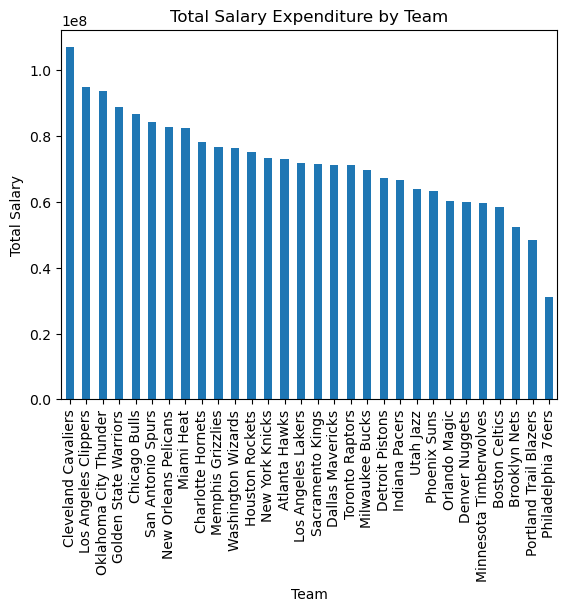

In [15]:
plt.figure()
team_salary.plot(kind='bar')
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.show()

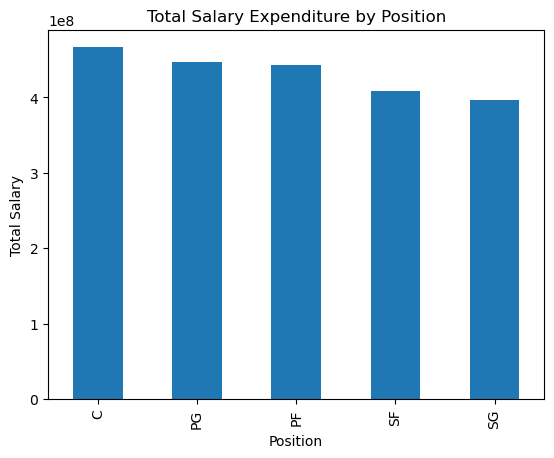

In [16]:
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)
position_salary

plt.figure()
position_salary.plot(kind='bar')
plt.title('Total Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary')
plt.show()

In [18]:
# 5 Correlation Between Age & Salary

correlation = df['Age'].corr(df['Salary'])
correlation

np.float64(0.21400941226570971)

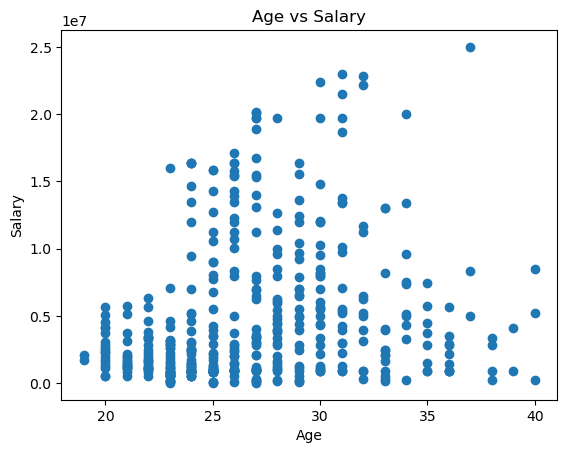

In [19]:
plt.figure()
plt.scatter(df['Age'], df['Salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()